## K-means Clustering 

### K-Means Clustering
For this question, you will use the **K-Means** clustering algorithm to cluster the yeast dataset. You will experiment with different k values, and report the Sum of Squared Errors (see below) for each k.



### Sum of Squared Errors (SSE)
Assume that we have a clustering for our data $X$ having $K$ clusters. Each cluster is characterized by it’s centroid $C_k$ . The sum of squared error criterion for one cluster can be defined as:
$$SSE(X,C =k)= \sum_{x_i \in cluster_k}||x_i −C_k||2 $$ 
then, the overall SSE for the K clusters can be calculated as:

$$ SSE(X)= \sum_{k=1}^K SSE(X,C=k)$$
SSE provides a notion of how compact the clusters are and we are going to favor clusters that are more compact, hence we will look for clusterings that minimize SSE. This is an internal clustering quality criterion as we can estimate it using just the cluster labels.

In [ ]:
# Do not change anything in this cell.
import numpy as np
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy
import pandas as pd
import math
import copy
import matplotlib.pyplot as plt

In [ ]:
# =============================================================================#
# Load a CSV file
def load_csv(filename):
    data = pd.read_csv(filename, header=None)
    dataset = data.values
    return dataset

In [ ]:
# =============================================================================#
'''
Initialize the k centroids.
'''
def initialize_centroids(k, dataset):
    centroids = []
    for i in range(k):
        centroids.append(dataset[i])
    return centroids


In [ ]:
# =============================================================================#
def calculate_znk(data, centroids, k, n):
    '''
    Assign each point to the closest centroid, using a Matrix Z to represent the assignments
    '''
    znk = numpy.array([[0 for i in range(k)] for j in range(n)])
    for i in range(n):
        distance_to_cen = []
        for j in range(k):
            # calculate the distance squared
            distance = 0
            for m in range(data.shape[1]):
                distance += (data[i, m] - centroids[j][m]) ** 2
            distance_to_cen.append(numpy.sqrt(distance))
        # assign the closer centroid index to be 1
        znk[i, numpy.argmin(distance_to_cen)] = 1
    return znk

In [ ]:
# =============================================================================#
def calculate_centroids_and_SSE(k, znk, data, cen):
    '''
    Calculate the k centroids and the SSE
    '''
    centroids = []
    #clusters = []
    for i in range(k):
        cluster_i = numpy.where(znk[:, i] == 1)[0]
        #clusters.append(len(cluster_i))
        centroid = []
        for j in range(data.shape[1]):
            if len(cluster_i) == 0:
                centroid = cen[i]
                break
            else:
                centroid.append(sum(data[cluster_i, j]) / len(cluster_i))
        centroids.append(centroid)

    total_SSE = 0
    for i in range(data.shape[0]):
        for j in range(k):
            # calculate the distance squared
            if not centroids[j][0]:
                continue
            total_SSE += znk[i, j] * calculate_d_squared(data[i, :], centroids[j])
    return centroids, total_SSE

In [ ]:
# This function calculate the squared distance between two vectors(points)
def calculate_d_squared(x, centroid):
    distance = 0
    for i in range(x.shape[0]):
        distance += (x[i] - centroid[i]) ** 2
    return distance

In [ ]:
# =============================================================================#
def k_means_algorithm(dataset, k, max_iterations, thresh = 0.01):
    '''
    Do k-means by iteratively calculating the centroids and assigning the data points to one of the centroids
    until either we reach the max_iter or SSE does not decrease by more than the threshold.
    Do not use the last column, as they are the labels.
    '''
    centroids = initialize_centroids(k, dataset)
    n = len(dataset)
    data = dataset[:, 0:dataset.shape[1] - 1]
    cen = []
    prev_SSE = math.inf
    for i in range(max_iterations):
        znk = calculate_znk(data, centroids, k, n)
        centroids, total_SSE = calculate_centroids_and_SSE(k, znk, data, centroids)
        if prev_SSE - total_SSE <= thresh:
            #stop when SSE does not decrease by more than the threshold
            return prev_SSE, znk, centroids
        cen.append(centroids)
        #data.append(total_SSE)
        prev_SSE = total_SSE
    return prev_SSE, znk, centroids



SSE for k= 2 is 94.16634322044357
SSE for k= 4 is 70.77402837824934
SSE for k= 6 is 54.78035253521831
SSE for k= 8 is 48.80812672080955
SSE for k= 10 is 44.99032745150484
SSE for k= 12 is 41.523432060297715
SSE for k= 14 is 39.80860317468567
SSE for k= 16 is 37.6736423178586
SSE for k= 18 is 36.30823794193829
--------------------------------------------------


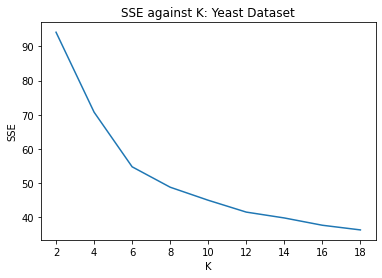

In [ ]:
# =============================================================================#
# MAIN FUNCTION, DO NOT MODIFY
dataset_name = 'yeastData.csv'
# Careful, the dataset also consists of labels
dataset = load_csv(dataset_name)
max_iterations = 1000
sum_sq_error = []


K = numpy.arange(2, 20, 2)
for k in K:
    SSE, znk, centroids = k_means_algorithm(dataset, k, max_iterations)
    sum_sq_error.append(SSE)
    print("SSE for k= ", end='')
    print(k, end='')
    print(' is ', end='')
    print(SSE)


print("-" * 50)
plt.plot(K, sum_sq_error)
plt.title("SSE against K: Yeast Dataset")
plt.xlabel("K")
plt.ylabel("SSE")
plt.show()
